# Adult comparison

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import HardVotingClassifier, SoftVotingClassifier, KMostSureVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2

# Loading the Adult data

In [3]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore

BB = load_adult_randomforest()
BB_DATA = load_adult_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))
test_representatives_x = BB_DATA['X_attack_3_per_quantile']
test_representatives_y = BB_DATA['y_attack_3_per_quantile']
n_datasets = len(test_representatives_x)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



## Loading the attack ensembles

## Noisy + $3$ std

report full
              precision    recall  f1-score   support

          in       0.70      0.29      0.41     24230
         out       0.30      0.71      0.42     10370

    accuracy                           0.41     34600
   macro avg       0.50      0.50      0.41     34600
weighted avg       0.58      0.41      0.41     34600


Class 0
              precision    recall  f1-score   support

          in       0.69      0.10      0.18     19276
         out       0.30      0.89      0.45      8289

    accuracy                           0.34     27565
   macro avg       0.50      0.50      0.32     27565
weighted avg       0.57      0.34      0.26     27565


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4954
         out       0.25      0.00      0.00      2081

    accuracy                           0.70      7035
   macro avg       0.48      0.50      0.42      7035
weighted avg       0.57      0.70      0.58 

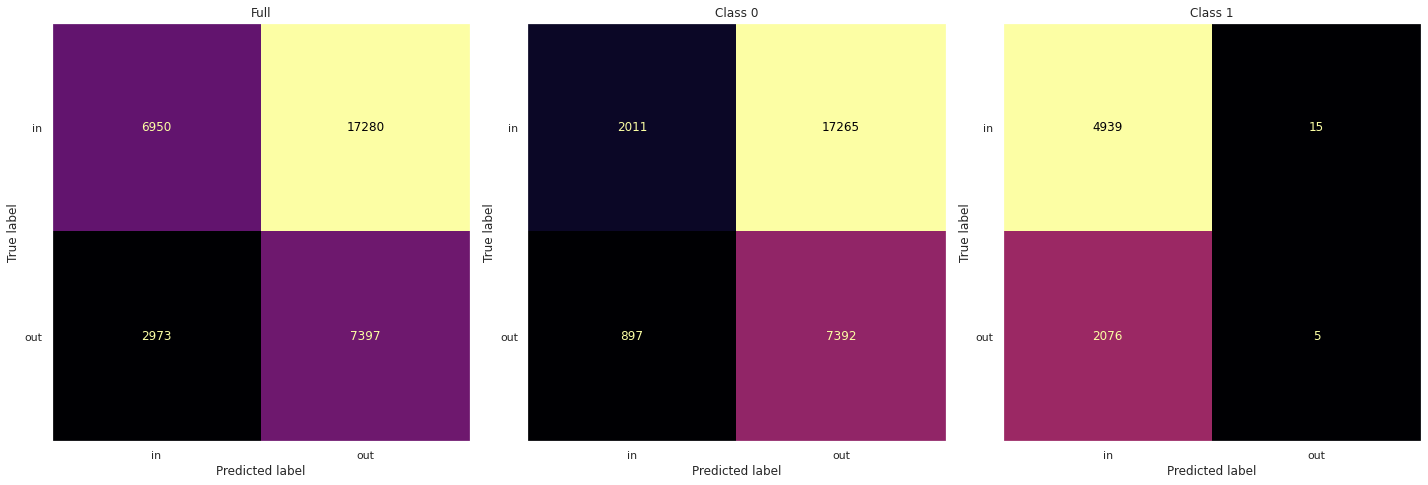

In [4]:
NOISY_BASE_PATH = Path("../../noisy_dataset/adult/experiment_output/")
noisy_3_std_0 = [load_pickle_bz2(NOISY_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
noisy_3_std_1 = [load_pickle_bz2(NOISY_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
noisy_ens_0 = HardVotingClassifier(noisy_3_std_0)
noisy_ens_1 = HardVotingClassifier(noisy_3_std_1)

evaluate_attack(noisy_ens_0, noisy_ens_1, BB, BB_DATA)

## Same as DT + $3$ std

report full
              precision    recall  f1-score   support

          in       0.70      0.15      0.25     24686
         out       0.30      0.85      0.44     10577

    accuracy                           0.36     35263
   macro avg       0.50      0.50      0.34     35263
weighted avg       0.58      0.36      0.31     35263


Class 0
              precision    recall  f1-score   support

          in       0.69      0.11      0.19     19956
         out       0.30      0.89      0.45      8607

    accuracy                           0.34     28563
   macro avg       0.50      0.50      0.32     28563
weighted avg       0.57      0.34      0.27     28563


Class 1
              precision    recall  f1-score   support

          in       0.71      0.33      0.45      4730
         out       0.30      0.68      0.41      1970

    accuracy                           0.43      6700
   macro avg       0.50      0.50      0.43      6700
weighted avg       0.59      0.43      0.44 

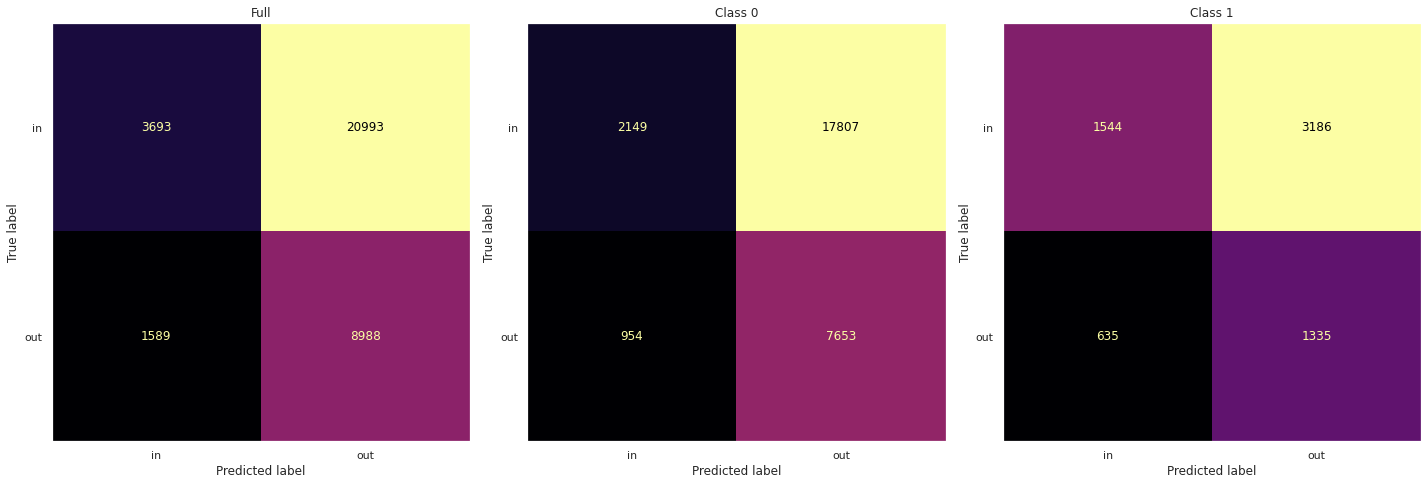

In [5]:
DT_STD_BASE_PATH = Path("../../decision_tree_dataset/adult/experiment_output/")
dt_3_std_0 = [load_pickle_bz2(DT_STD_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
dt_3_std_1 = [load_pickle_bz2(DT_STD_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
dt_std_ens_0 = HardVotingClassifier(dt_3_std_0)
dt_std_ens_1 = HardVotingClassifier(dt_3_std_1)

evaluate_attack(dt_std_ens_0, dt_std_ens_1, BB, BB_DATA)

## Same as DT without std

report full
              precision    recall  f1-score   support

          in       0.70      0.92      0.79     24558
         out       0.31      0.09      0.14     10526

    accuracy                           0.67     35084
   macro avg       0.51      0.50      0.47     35084
weighted avg       0.58      0.67      0.60     35084


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81     20131
         out       0.30      0.03      0.05      8665

    accuracy                           0.69     28796
   macro avg       0.50      0.50      0.43     28796
weighted avg       0.58      0.69      0.58     28796


Class 1
              precision    recall  f1-score   support

          in       0.71      0.65      0.68      4427
         out       0.31      0.38      0.34      1861

    accuracy                           0.57      6288
   macro avg       0.51      0.51      0.51      6288
weighted avg       0.60      0.57      0.58 

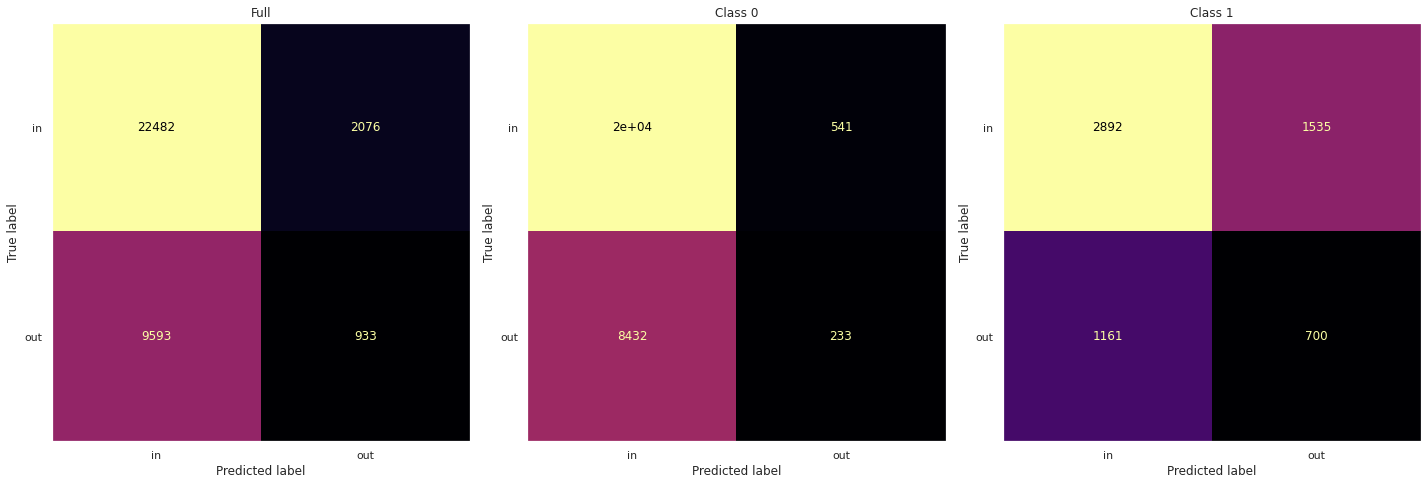

In [6]:
DT_BASE_PATH = Path("../../decision_tree_dataset_no3std/adult/experiment_output/")
dt_0 = [load_pickle_bz2(DT_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
dt_1 = [load_pickle_bz2(DT_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
dt_ens_0 = HardVotingClassifier(dt_0)
dt_ens_1 = HardVotingClassifier(dt_1)

evaluate_attack(dt_ens_0, dt_ens_1, BB, BB_DATA)